In [4]:
#!pip install networkx --user
import numpy as np
import networkx as nx
print("Networkx version: {}".format(nx.__version__))
from time import time
import matplotlib.pyplot as plt
import random
import seaborn as sns
sns.set()

print("numpy version: {}".format(np.__version__))
print("Networkx version: {}".format(nx.__version__))

from scipy.stats import norm
import numexpr
numexpr.print_versions()
%matplotlib inline

Networkx version: 2.4
numpy version: 1.17.2
Networkx version: 2.4
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Numexpr version:   2.7.0
NumPy version:     1.17.2
Python version:    3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) 
[GCC 7.3.0]
Platform:          linux-x86_64-#1 SMP Mon Sep 16 14:19:51 EDT 2019
CPU vendor:        
CPU model:         
CPU clock speed:    MHz
VML available?     True
VML/MKL version:   Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for Intel(R) 64 architecture applications
Number of threads used by default: 8 (out of 64 detected cores)
Maximum number of threads: 64
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


In [2]:
import tensorflow as tf
print(tf.__version__)

if tf.test.gpu_device_name() == '/device:GPU:0':
  print("Using a GPU")
else:
  print("Using a CPU")


import os
print(os.environ['HOME'])
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfb = tfp.bijectors

from tensorflow_probability import edward2 as ed
tfd = tfp.distributions

2.0.0
Using a GPU
/u/yan30


In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]

'0'

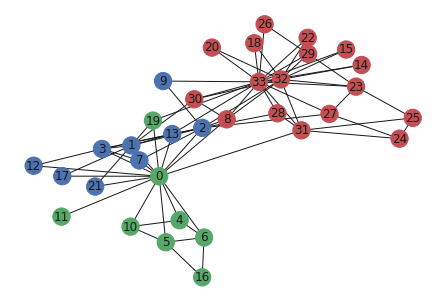

In [3]:
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community import greedy_modularity_communities
G1 = nx.karate_club_graph()
c = list(greedy_modularity_communities(G1))
# show first 5 graphs
pos = nx.spring_layout(G1)
colors = np.array(['r', 'b', 'g'])
label = np.arange(0,len(G1))
label[list(c[0])] = 0
label[list(c[1])] = 1
label[list(c[2])] = 2
nx.draw(G1, node_color=colors[label], with_labels=True, pos=pos)
plt.show()
plt.close()

In [4]:
for u,v,d in G1.edges(data=True):
    G1[u][v]['weight']=np.linalg.norm(pos[u]-pos[v])

In [116]:
#G1[33][9]['weight']=0.002
G1[2][28]['weight']=0.001
#G1[2][8]['weight']=0.003
G1[8][32]['weight']=0.002
G1[8][33]['weight']=0.002
#G1[32][33]['weight']=0.002
#G1[33][14]['weight']=0.004
#G1[32][14]['weight']=0.005
#G1[33][20]['weight']=0.004
#G1[32][20]['weight']=0.005
#G1[5][6]['weight']=0.004

In [46]:
G0 = nx.relabel_nodes(H, mapping)
G0[5][7]['weight']=0.002
#G0[4][6]['weight']=0.002
edgesTop=sorted(G0.edges(data=True), key=lambda t: t[2].get('weight', 1))
percent = int(len(edgesTop)/4)
eList = [(x[0],x[1]) for x in edgesTop[:percent]]
eList
#nx.draw(G1.edge_subgraph(eList), with_labels=True, pos=pos)

[(7, 5), (3, 1), (2, 5), (7, 1), (4, 5), (4, 3), (7, 4)]

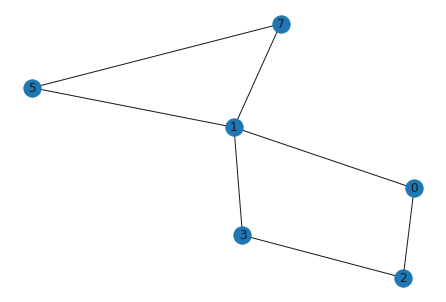

In [14]:
sub = G0.edge_subgraph(eList)
nx.draw(sub, with_labels=True)

In [15]:
sub = G0.edge_subgraph(eList)
graphs = [sub.subgraph(c) for c in nx.connected_components(sub)]
graphs[0].edges(data=True)

EdgeDataView([(7, 5, {'weight': 0.002}), (7, 1, {'weight': 0.2777180782405222}), (0, 1, {'weight': 0.277879970083924}), (0, 2, {'weight': 0.2783077678968059}), (2, 3, {'weight': 0.27827086601737466}), (5, 1, {'weight': 0.2762923276928997}), (3, 1, {'weight': 0.2782724771462351})])

In [26]:
G0[0][1]['weight']

0.27859376469885117

In [18]:
import networkx.algorithms.clique as clix

sub = G0.edge_subgraph(eList)
graphs = [sub.subgraph(c) for c in nx.connected_components(sub)]
max_clique_sets = [clix.find_cliques(s) for s in graphs]
cliques = []
for clist in max_clique_sets:
    tmp = []
    for c in clist:
        if (len(c)<=3) and (len(c)>=2):
            cohesion = 0
            for idx, x in enumerate(c):
                for idy, y in enumerate(c):
                    if (idy>idx):
                        cohesion = cohesion + G0[x][y]['weight']
            tup = (set(c),cohesion/(len(c)-1)/(len(c)-1)) #higher order cliques prioritized
            tmp.append(tup)
    tmp = sorted(tmp, key=lambda t: t[1]) #sort cliques
    cliques += tmp[:4] #keep only top 3 cliques for each component
cliques

[({1, 5, 7}, 0.13900260148335547),
 ({0, 1}, 0.277879970083924),
 ({2, 3}, 0.27827086601737466),
 ({1, 3}, 0.2782724771462351)]

In [70]:
len([  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20 419  21  22  23  24  25  26  27  28  29  30 424  31  32  33
  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62 428  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 427 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 424 172 173 174
 175 176 177 178 421 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 422 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 420 269 270 271 272 273 419 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 423 295
 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313
 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331
 426 332 421 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 423 352 353 354 355 356 357 358 359 360 361 362 363 364
 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382
 383 384 427 385 386 387 425 388 389 390 391 392 393 394 395 396 397 398
 399 400 401 402 403 425 404 405 406 407 408 409 410 411 420 412 413 414
 415 422 416 417 418])

SyntaxError: invalid syntax (<ipython-input-70-255c8f7b3781>, line 1)

In [62]:
#CliList = sorted(cliques, key=lambda t: t[1])
cliquesFiltered = [x[0] for x in CliList]
cliquesFiltered

[{23, 37, 38}, {21, 37, 38}]

In [64]:
CliXO = {}    
nodeSet = sorted(set().union(*cliquesFiltered))
for x in nodeSet:
    CliXO[x] = []
    for idx, y in enumerate(cliquesFiltered):
        if (x in y) and len(CliXO[x])<4:
            CliXO[x].append(idx)
            #liXO[x].append(labelSet[idx])
CliXO

{21: [1], 23: [0], 37: [0, 1], 38: [0, 1]}

In [66]:
nodeSet

[21, 23, 37, 38]

In [68]:
import itertools as it
labels = np.arange(333)

combinations = it.product(*(CliXO[Name] for Name in nodeSet))
count = 0
for update in combinations:
    #print(update)
    count +=1
    for idx, x in enumerate(update):
        print(nodeSet[idx],len(labels)+x, end = ' | ')
    print()
print(count)

21 334 | 23 333 | 37 333 | 38 333 | 
21 334 | 23 333 | 37 333 | 38 334 | 
21 334 | 23 333 | 37 334 | 38 333 | 
21 334 | 23 333 | 37 334 | 38 334 | 
4


In [348]:
import networkx.algorithms.clique as clix
import itertools as it

sub = G0.edge_subgraph(eList)
graphs = [sub.subgraph(c) for c in nx.connected_components(sub)]
max_clique_sets = [clix.find_cliques(s) for s in graphs]
cliques = []
for clist in max_clique_sets:
    tmp = [set(x) for x in clist if (len(x)<=3) and (len(x)>=2)]
    cliques += tmp 
cliques
print(cliques)

CliList = []
for c in triad_cliques:
    cohesion = 0
    for idx, x in enumerate(c):
        for idy, y in enumerate(c):
            if (idy>idx):
                cohesion = cohesion + G0[x][y]['weight']
    tup = (c,cohesion/(len(c)-1)/(len(c)-1)) #higher order cliques prioritized
    CliList.append(tup)
CliList = sorted(CliList, key=lambda t: t[1])
cliquesFiltered = [x[0] for x in CliList]
cliquesFiltered

CliXO = {}    
nodeSet = sorted(set().union(*cliques))
for x in nodeSet:
    CliXO[x] = []
    for idx, y in enumerate(cliquesFiltered):
        if (x in y) and len(CliXO[x])<4:
            CliXO[x].append(idx)
#print(CliXO)
combinations = it.product(*(CliXO[Name] for Name in nodeSet))

labels = np.arange(8)
Llist = []
for update in combinations:
    labelsNew = labels.copy()  
    for idx, x in enumerate(update):
        labelsNew[nodeSet[idx]] = len(labels)+x
    #print(labelsNew)
    b,c =np.unique(labelsNew, return_inverse=True)
    Llist.append(c)
Llist

[{3, 4}, {1, 5}, {2, 5}, {4, 5}, {0, 7}]


[array([3, 1, 2, 4, 3, 1, 0, 5]),
 array([3, 1, 2, 4, 3, 2, 0, 5]),
 array([3, 1, 2, 4, 3, 5, 0, 6]),
 array([3, 1, 2, 4, 4, 1, 0, 5]),
 array([3, 1, 2, 4, 4, 2, 0, 5]),
 array([3, 1, 2, 4, 4, 5, 0, 6]),
 array([3, 1, 2, 4, 5, 1, 0, 6]),
 array([3, 1, 2, 4, 5, 2, 0, 6]),
 array([3, 1, 2, 4, 5, 5, 0, 6])]

In [363]:
np.random.normal(0,0.001,1)

array([-0.00045929])

11

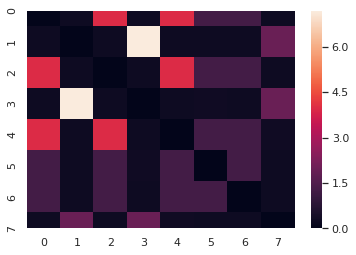

In [38]:
from networkx import relabel

G = nx.read_edgelist("data/resnik.txt", delimiter='\t' , nodetype=str,  data=(('weight',float),))
for u,v,d in G.edges(data=True):
    G[u][v]['weight']=G[u][v]['weight'] + np.random.normal(0,0.001)
H = G.subgraph(['ACD', 'ABL1', 'ACTL6A', 'ACTR5', 'ACTR8', 'ALKBH1', 'ALKBH2', 'ALKBH3'])
mapping = {'ACD':6, 'ABL1':3, 'ACTL6A':7, 'ACTR5':5, 'ACTR8':0, 'ALKBH1':1, 'ALKBH2':2, 'ALKBH3':4}
G0 = nx.relabel_nodes(H, mapping)
A = nx.adjacency_matrix(G0).todense()
ax = sns.heatmap(A)
#np.fill_diagonal(A, -99999)
am = A.argmax() #find min pair
c0 = am % A.shape[1]
am

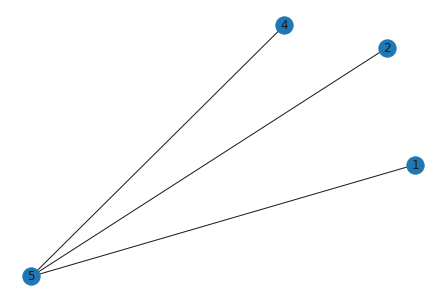

In [303]:
edgesTop=sorted(G0.edges(data=True), key=lambda t: t[2].get('weight', 1))
percent = int(len(edgesTop)/8)
eList = [(x[0],x[1]) for x in edgesTop[:percent]]

pos = nx.spring_layout(G0)
nx.draw(G0.edge_subgraph(eList), with_labels=True, pos=pos)

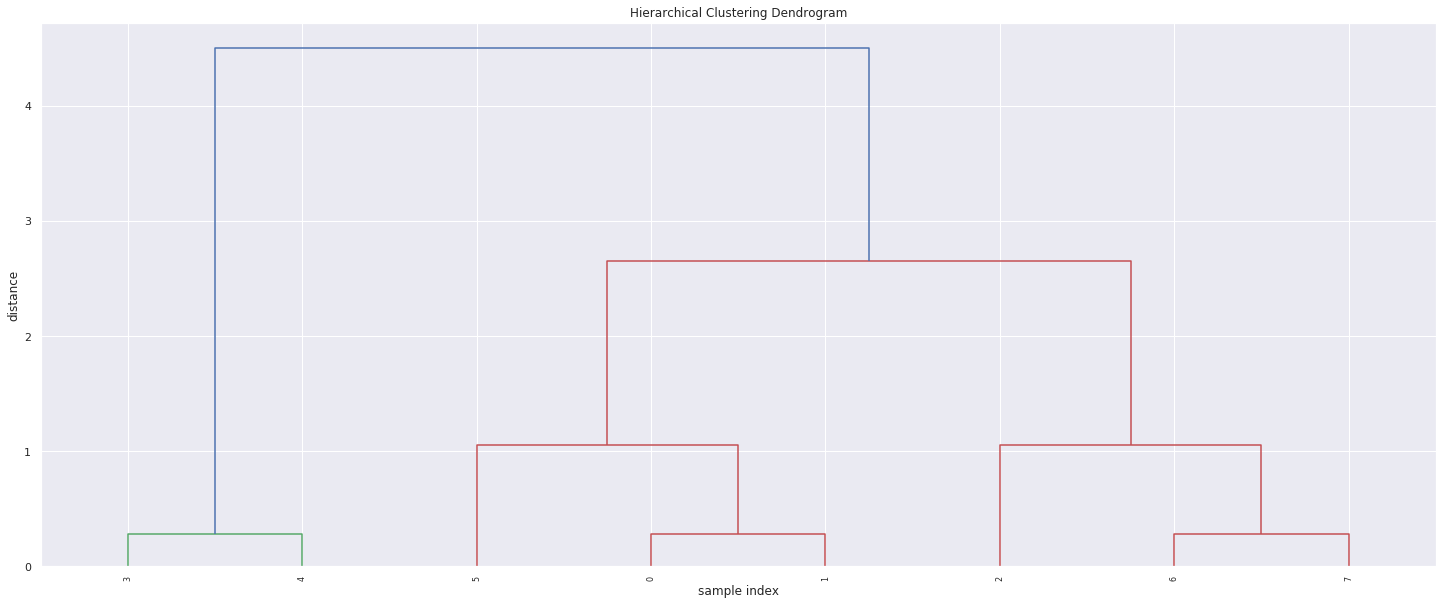

array([[ 6.        ,  7.        ,  0.27661968,  2.        ],
       [ 3.        ,  4.        ,  0.27677415,  2.        ],
       [ 0.        ,  1.        ,  0.27956896,  2.        ],
       [ 5.        , 10.        ,  1.05690063,  3.        ],
       [ 2.        ,  8.        ,  1.05699099,  3.        ],
       [11.        , 12.        ,  2.65316248,  6.        ],
       [ 9.        , 13.        ,  4.49792729,  8.        ]])

In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

listA = squareform(A)
Z = linkage(listA, 'ward')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()
Z

In [8]:
import pymc3 as pm
import theano.tensor as tt

def make_pymc3_sbm(Gs, k, labels, directed=False, selfloops=False):
    # input can be a single graph or a list of graphs
    if isinstance(Gs, nx.Graph):
        Gs = [Gs]
    n = len(Gs[0])
    # whether to include the diagonal or not
    if selfloops:
        triu_indices = np.triu_indices(n, k=1)
    else:
        triu_indices = np.triu_indices(n)
    # convert to adjacency matrix
    # if graph is undirected, we just need the upper triangular part
    if directed:
        A_obs = np.array([nx.to_numpy_array(G) for G in Gs])
    else:
        A_obs = np.array([nx.to_numpy_array(G)[triu_indices] for G in Gs])

    model = pm.Model()
    with model:
        #pi = pm.Dirichlet('pi', a=np.ones(k), shape=(k,))
        z = labels #pm.Categorical('z', p=pi, shape=(n,))
        eta = pm.Normal('eta', mu=10, sd = 1, shape=(k, k))#.astype('float32')
        # parameters to sample the adjacency matrix
        # p[i, j] = eta[z[i], z[j]] is the parameter corresponding to A[i, j]
        p = eta[(z.reshape((n, 1)), z.reshape((1, n)))]
        if not selfloops:
            tt.set_subtensor(p[np.diag_indices(n)], 0.)
        if not directed:
            p = eta[(z.reshape((n, 1)), z.reshape((1, n)))][triu_indices]
        W = pm.Normal('W', mu=p, sd=1, shape=A_obs[0].shape, observed=A_obs)#.astype('float32')
    return model

ModuleNotFoundError: No module named 'pymc3'

In [5]:
k = 3
labels = np.full(shape=len(G),fill_value=0)
labels[::3] = 1
model = make_pymc3_sbm(G, k, labels)
with model as m1:
    #start = pm.find_MAP()
    #trace = pm.sample(50000, start=start, progressbar=True)
    trace1 = pm.sample(500, tune = 500,)

/N/soft/rhel7/deeplearning/Python-3.6.8/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/N/soft/rhel7/deeplearning/Python-3.6.8/lib/python3.6/site-packages/theano/tensor/subtensor.py:2339: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/N/soft/rhel7/deeplearning/Python-3.6.8/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: F

ValueError: Not enough samples to build a trace.

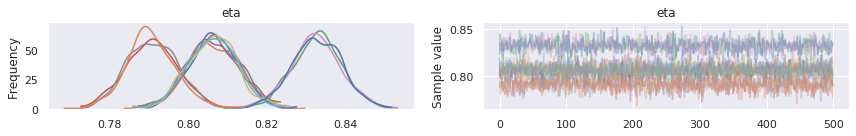

In [17]:
pm.traceplot(trace1);

In [18]:
pm.summary(trace1)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
eta__0_0,0.806526,0.006289,0.000156,0.795399,0.819532,1509.904629,0.999666
eta__0_1,0.832539,0.006468,0.000164,0.820724,0.846360,1588.340047,1.000041
eta__1_0,0.806286,0.006623,0.000130,0.792825,0.819012,1971.517655,0.999522
eta__1_1,0.790701,0.006497,0.000165,0.777662,0.803034,1713.584897,0.999712


In [51]:
#Define the joint_log_prob function, and our unnormalized posterior.
def SBM_prob(G, k, labels, directed=False, selfloops=False):
  # the SBM log-likelihood generative steps
    n = len(G)
    z = labels
    eta = ed.Normal(loc=10, scale=1, name="eta", sample_shape=[k,k]) #beta prior for simple edges
    # parameters to sample the adjacency matrix
    # p[i, j] = eta[z[i], z[j]] is the parameter corresponding to A[i, j]
    # very inefficient parameterization
    tile_a = tf.tile(tf.expand_dims(z, 1), [1, tf.shape(z)[0]])  
    tile_a = tf.expand_dims(tile_a, 2) 
    tile_b = tf.tile(tf.expand_dims(z, 0), [tf.shape(z)[0], 1]) 
    tile_b = tf.expand_dims(tile_b, 2)
    p = tf.gather_nd(eta, tf.concat([tile_a, tile_b], axis=2))
    #if not selfloops:
    #    TT.set_subtensor(p[np.diag_indices(n)], 0.)
    #if not directed:
    #    p = eta[(z.reshape((n, 1)), z.reshape((1, n)))][triu_indices] #replace with equation 5.5 for analytical posterior, including DC?
    #if weighted:
    #    A = ed.Poisson(name = 'A', mu=p, shape=A_obs[0].shape, observed=A_obs) #collect edge/non-edge statistics for the analytical posterior
    #else:
    A = ed.Normal(name = 'A', loc=p, scale=1)
    return A

In [ ]:
#Define the joint_log_prob function, and our unnormalized posterior.
def SBM_prob_fast(G, k, labels, directed=False, selfloops=False):
    # 
    n = len(G)    
    z = labels
    # the SBM log-likelihood generative steps
    #a = tf.ones(k) #number of blocks
    #pi = ed.Dirichlet(concentration=a, name="pi") #prior for block assignments  
    #z = ed.Categorical(probs=pi, name="z",sample_shape=n) #block labels
    if weighted:
        eta = ed.Normal(loc=10, scale=1, name="eta", sample_shape=[k,k]) #beta prior for simple edges
    else:
        eta = ed.Beta(concentration1=1, concentration0=1, name="eta", sample_shape=[k,k]) #beta prior for simple edges
    #if not selfloops:
    #    tt.set_subtensor(p[np.diag_indices(n)], 0.)
    #if not directed:
    
    # Collect block-pairwise edge/non-edge sufficient statistics for the analytical posterior
    # Weighted(counting) version to be updated
    m_obs = tf.zeros([k,k])
    for i in range(n):
        for j in range(i+1, n):
            cumulate_value_at_position(z[i], z[j], nx.to_numpy_array(G)[i,j])
    
    # Original p = eta[(z.reshape((n, 1)), z.reshape((1, n)))][triu_indices] #replace with equation 5.5 for analytical posterior, including DC?
    # replace the n*n adjacency matrix p with the k*k affinity matrix m
    if weighted:
        m = ed.Gamma(name = 'm', alpha=.001, beta=.001, shape=(k, k)) #replace with equation 5.5 for analytical posterior, including DC?
    else:
        for i in range(k):
            for j in range(k):
                m = ed.Beta(name = 'm_{i}_{j}', alpha=1, beta=1, shape=(k, k), observed=cumulator[i,j])
    if weighted:
        logP = ed.Poisson(name='A', probs=p) #manual analytical posterior vs ed.make_log_joint_fn()
    return logP

In [ ]:
log_joint = ed.make_log_joint_fn(SBM_prob)
# Function to compute the log posterior probability
n = len(G)
A_obs = tf.convert_to_tensor(nx.to_numpy_array(G), dtype=tf.float32)

#def setParameters(k, label):
k = 3
label = np.random.randint(low = 0, high = 3, size = n) 

def target_log_prob_fn(eta):
  return log_joint(
      G = G,
      k = label.max()+1,
      labels = label,
      eta = eta,
      A=A_obs)

# set initial state (drawn from prior)
peta = tf.random.uniform([k,k], minval=0, maxval=1, dtype=tf.float32)
print(target_log_prob_fn(peta)) #test the target_log_prob_fn with initial state
np.exp(target_log_prob_fn(peta).numpy())

/u/yan30/.conda/envs/tf-prob/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: tfp.edward2 module is deprecated and will be removed on 2019-12-01. Use https://github.com/google/edward2 library instead.
  """Entry point for launching an IPython kernel.


In [11]:
Nsamples = 100  # final number of samples
Nburn = 100     # number of tuning samples

# set up Hamiltonian MC
def sampleMAP(peta, target_log_prob_fn):
    hmc_kernel = tfp.mcmc.HamiltonianMonteCarlo(
        target_log_prob_fn=target_log_prob_fn,
        step_size=0.01,
        num_leapfrog_steps=5)

    states, kernel_results = tfp.mcmc.sample_chain(
        num_results=Nsamples,
        num_burnin_steps=Nburn,
        current_state=[peta],
        trace_fn=(lambda current_state, kernel_results: kernel_results),
        parallel_iterations=100,
        kernel=hmc_kernel)
    return kernel_results.proposed_results.target_log_prob.numpy().mean() ##mean for MAP estimates
#kernel_results.is_accepted.numpy().mean()

In [93]:
import cProfile
cProfile.run('sample(peta,target_log_prob_fn)')

         8839090 function calls (8783742 primitive calls) in 10.639 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     2002    0.002    0.000    0.033    0.000 <__array_function__ internals>:2(array_equal)
     1600    0.002    0.000    0.051    0.000 <__array_function__ internals>:2(prod)
     2002    0.047    0.000    5.746    0.003 <ipython-input-5-28694918dce6>:2(SBM_prob)
     2002    0.010    0.000    6.211    0.003 <ipython-input-85-7021282f6e12>:5(target_log_prob_fn)
      101    0.000    0.000    0.000    0.000 <ipython-input-92-8e2c8485a706>:15(<lambda>)
        1    0.000    0.000   10.642   10.642 <ipython-input-92-8e2c8485a706>:5(sample)
        1    0.000    0.000   10.642   10.642 <string>:1(<module>)
     2002    0.001    0.000    0.002    0.000 <string>:12(__new__)
     5005    0.003    0.000    0.009    0.000 <string>:16(_make)
      200    0.000    0.000    0.001    0.000 <string>:24(_replace)
     6006

In [94]:
k = 3
label = np.random.randint(low = 0, high = 3, size = n) 
peta = tf.random.uniform([k,k], minval=0, maxval=1, dtype=tf.float32)

def target_log_prob_fn(eta):
  return log_joint(
      G = G,
      k = label.max()+1,
      labels = label,
      eta = eta,
      A=A_obs)

# set up Hamiltonian MC
hmc_kernel = tfp.mcmc.HamiltonianMonteCarlo(
    target_log_prob_fn=target_log_prob_fn,
    step_size=0.01,
    num_leapfrog_steps=5)

states, kernel_results = tfp.mcmc.sample_chain(
    num_results=Nsamples,
    num_burnin_steps=Nburn,
    current_state=[peta],
    trace_fn=(lambda current_state, kernel_results: kernel_results),
    parallel_iterations=100,
    kernel=hmc_kernel)
kernel_results.proposed_results.target_log_prob.numpy()

array([-291433.47, -291433.62, -291445.62, -291440.1 , -291431.72,
       -291434.88, -291435.  , -291433.78, -291434.56, -291433.66,
       -291435.62, -291440.7 , -291435.53, -291433.75, -291450.6 ,
       -291440.2 , -291448.62, -291450.25, -291439.66, -291438.2 ,
       -291438.66, -291439.56, -291436.78, -291435.72, -291445.06,
       -291440.4 , -291443.06, -291434.8 , -291435.97, -291438.  ,
       -291439.7 , -291442.06, -291437.62, -291438.3 , -291434.56,
       -291436.47, -291437.97, -291435.53, -291436.75, -291439.75,
       -291433.6 , -291434.7 , -291434.28, -291437.38, -291434.44,
       -291434.2 , -291435.8 , -291448.66, -291436.56, -291439.9 ,
       -291435.38, -291432.66, -291434.06, -291447.2 , -291440.  ,
       -291434.94, -291431.56, -291436.2 , -291433.12, -291441.56,
       -291433.72, -291439.06, -291438.7 , -291433.53, -291434.22,
       -291437.6 , -291434.75, -291444.3 , -291436.72, -291443.2 ,
       -291435.6 , -291435.1 , -291440.5 , -291436.97, -291438

In [158]:
label = np.random.randint(low = 0, high = 4, size = n) 
k = label.max()+1

def target_log_prob_fn(eta):
  return log_joint(
      G = G,
      k = k,
      labels = label,
      eta = eta,
      A=A_obs)

peta = tf.random.uniform([k,k], minval=0, maxval=1, dtype=tf.float32)
sample(peta,target_log_prob_fn)

-296305.0

In [296]:
def updateDAG(G, NodeMerge):
    size = len(NodeMerge);
    nodeSet = sorted(set().union(*NodeMerge))
    A = nx.adjacency_matrix(G).todense()
    while len(NodeMerge)>0:
        nodes = NodeMerge.pop()
        newNodeV = np.sum(A[nodes,:],axis=0)/len(nodes)
        B = np.vstack([A, newNodeV])
        newNodeC = np.sum(B[:,nodes],axis=1)/len(nodes)
        A = np.column_stack([B, newNodeC])
        
    #print(nodeSet)
    A = np.delete(A, nodeSet, axis = 0)
    #print(A.shape)
    A = np.delete(A, nodeSet, axis = 1)
    dt=[('weight',float)]
    A = np.matrix(A,dtype=dt)
    np.fill_diagonal(A, 0)
    H = nx.from_numpy_matrix(A)
    #print(H.node())
    return H

In [245]:
Gnew = relabel.convert_node_labels_to_integers(G)
Gnew.get_edge_data(0, 1, default=0)['weight']

1.2796364

In [376]:
import networkx.algorithms.clique as clique
import itertools as it

def getCandidates(G, labels):
    edgesTop=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
    #percent = int(len(edgesTop)/5000) # adjust for layer size
    eList = [(x[0],x[1]) for x in edgesTop[:200]]
    sub = G.edge_subgraph(eList)
    graphs = [sub.subgraph(c) for c in nx.connected_components(sub)]
    print(len(graphs))
    max_clique_sets = [clix.find_cliques(s) for s in graphs]
    cliques = []
    for clist in max_clique_sets:
        tmp = [set(x) for x in clist if (len(x)<=3) and (len(x)>=2)]
        cliques += tmp 
    cliques

    CliList = []
    for c in cliques:
        cohesion = 0
        for idx, x in enumerate(c):
            for idy, y in enumerate(c):
                if (idy>idx):
                    cohesion = cohesion + G[x][y]['weight']
        tup = (c,cohesion/(len(c)-1)/(len(c)-1)-len(c)) #higher order cliques prioritized
        CliList.append(tup)
    CliList = sorted(CliList, key=lambda t: t[1])
    print(CliList)
    cliquesFiltered = [x[0] for x in CliList]

    CliXO = {}    
    nodeSet = sorted(set().union(*cliques))
    for x in nodeSet:
        CliXO[x] = []
        for idx, y in enumerate(cliquesFiltered):
            if (x in y) and len(CliXO[x])<3:
                CliXO[x].append(idx)
    combinations = it.product(*(CliXO[Name] for Name in nodeSet))
    Llist = []
    for update in combinations:
        labelsNew = labels.copy()    
        for idx, x in enumerate(update):
            labelsNew[nodeSet[idx]] = len(labels)+x
        b,c =np.unique(labelsNew, return_inverse=True)
        Llist.append(c)
    return Llist

In [15]:
def buildLayer(Gnew, knew, Llist):
    Mlist = []
    A_obs = tf.convert_to_tensor(nx.to_numpy_array(Gnew), dtype=tf.float32)
    for iteration in range (0,len(Llist)):
        label = Llist[iteration]
        def target_log_prob_fn(eta):
          return log_joint(
              G = Gnew,
              k = knew,
              labels = label,
              eta = eta,
              A=A_obs)

        peta = tf.random.uniform([knew,knew], minval=0, maxval=1, dtype=tf.float32)
        Mlist.append(sampleMAP(peta,target_log_prob_fn))

    #print(comp.weight)
    norm = [float(i)/sum(Mlist) for i in Mlist] 
    return sorted(norm, reverse = True)

In [29]:
newLabel = [0,4,5,3,3,4,1,2]
dup = [item for item, count in Counter(newLabel).items() if count > 1]
[idx for idx,label in enumerate(newLabel) if label==dup[1]]

[3, 4]

In [1]:
from collections import Counter
from networkx import relabel

label = np.arange(n)
Gnew = relabel.convert_node_labels_to_integers(G)

while True:
    Gnew = relabel.convert_node_labels_to_integers(Gnew)
    k = len(Gnew)
    label = np.arange(k)
    print(k)
    Llist = getCandidates(Gnew,label)
    ModelPosterior = buildLayer(Gnew, k-1, Llist)
    print(ModelPosterior)
    newInternal = [x for x in ModelPosterior[:3]] # only consider top 3 Bayesian assignemtns
    #newInternal = np.where(np.asarray(ModelPosterior) > thresh)[0] #keep Bayesian candidates above threshold
    NodeMerge = [] #nodes to be merged, nested lists of non-overlapping motifs
    for i in range (0,len(newInternal)):
        newLabel = Llist[i]
        print(newLabel)        
        dup = [item for item, count in Counter(newLabel).items() if count > 1]
        for dupL in dup:
            nodes = [idx for idx,label in enumerate(newLabel) if label==dupL]
            if nodes not in NodeMerge:
                NodeMerge.append(nodes)
    print(NodeMerge) 
    Gnew = updateDAG(Gnew, NodeMerge) #update the graph with node mergers/splits
    if k<=4:
        break    

NameError: name 'np' is not defined

In [ ]:
[x for x in ModelPosterior[:40]]

In [153]:
Gnew = G 
k = len(Gnew)
label = np.arange(k)
test = np.arange(3)

Llist = getCandidates(Gnew,label)
newInternal = np.where(test  > 0)[0]
newInternal

array([1, 2])

In [153]:
Llist[newInternal[0]]

array([0, 2, 1, 2, 3, 4, 5, 6])

In [112]:
label = np.array([0, 1, 2, 3, 4, 5, 6, 7])
Llist = getCandidates(G0,label)
Llist

[array([0, 0, 1, 2, 3, 4, 5, 6]),
 array([1, 0, 1, 2, 3, 4, 5, 6]),
 array([0, 2, 1, 2, 3, 4, 5, 6])]